#Importing

In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.feature_selection import SelectKBest,f_classif,VarianceThreshold
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.metrics import accuracy_score, confusion_matrix,make_scorer,recall_score,precision_score,f1_score

In [431]:
#loading dataset
df_original=pd.read_csv("/content/heart_disease_data.csv")
#copying the dataset
df=df_original.copy()

In [432]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [433]:
df.shape

(303, 14)

In [434]:
#checking for null values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [436]:
#checking data balance
df['target'].value_counts()

,count
target,
1,165
0,138


In [437]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


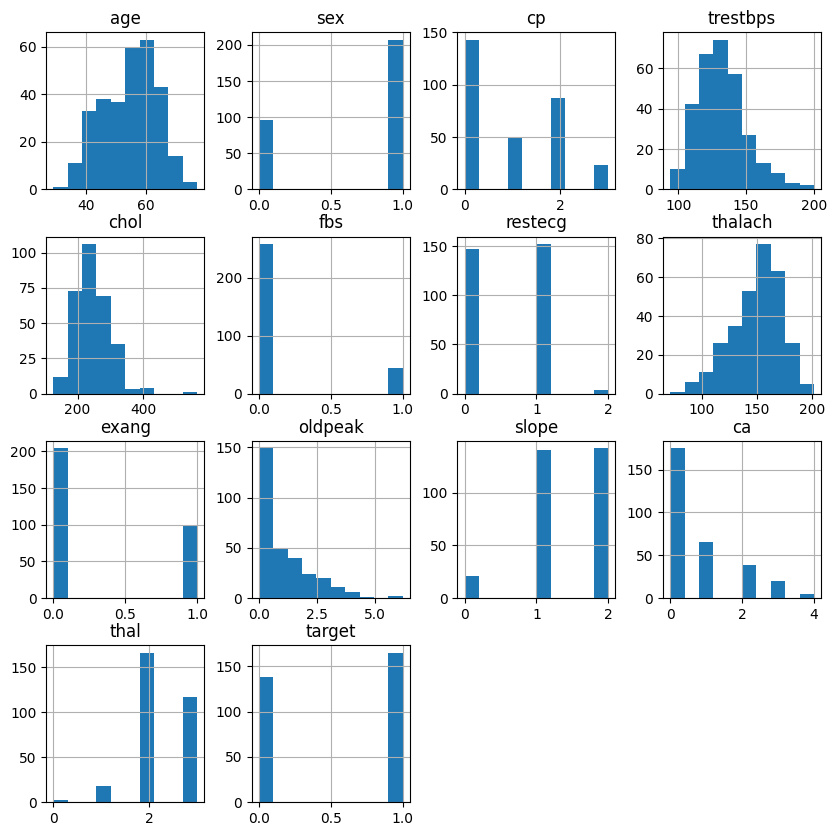

In [438]:
#univariate analysis
df.hist(figsize=(10,10))
plt.show()

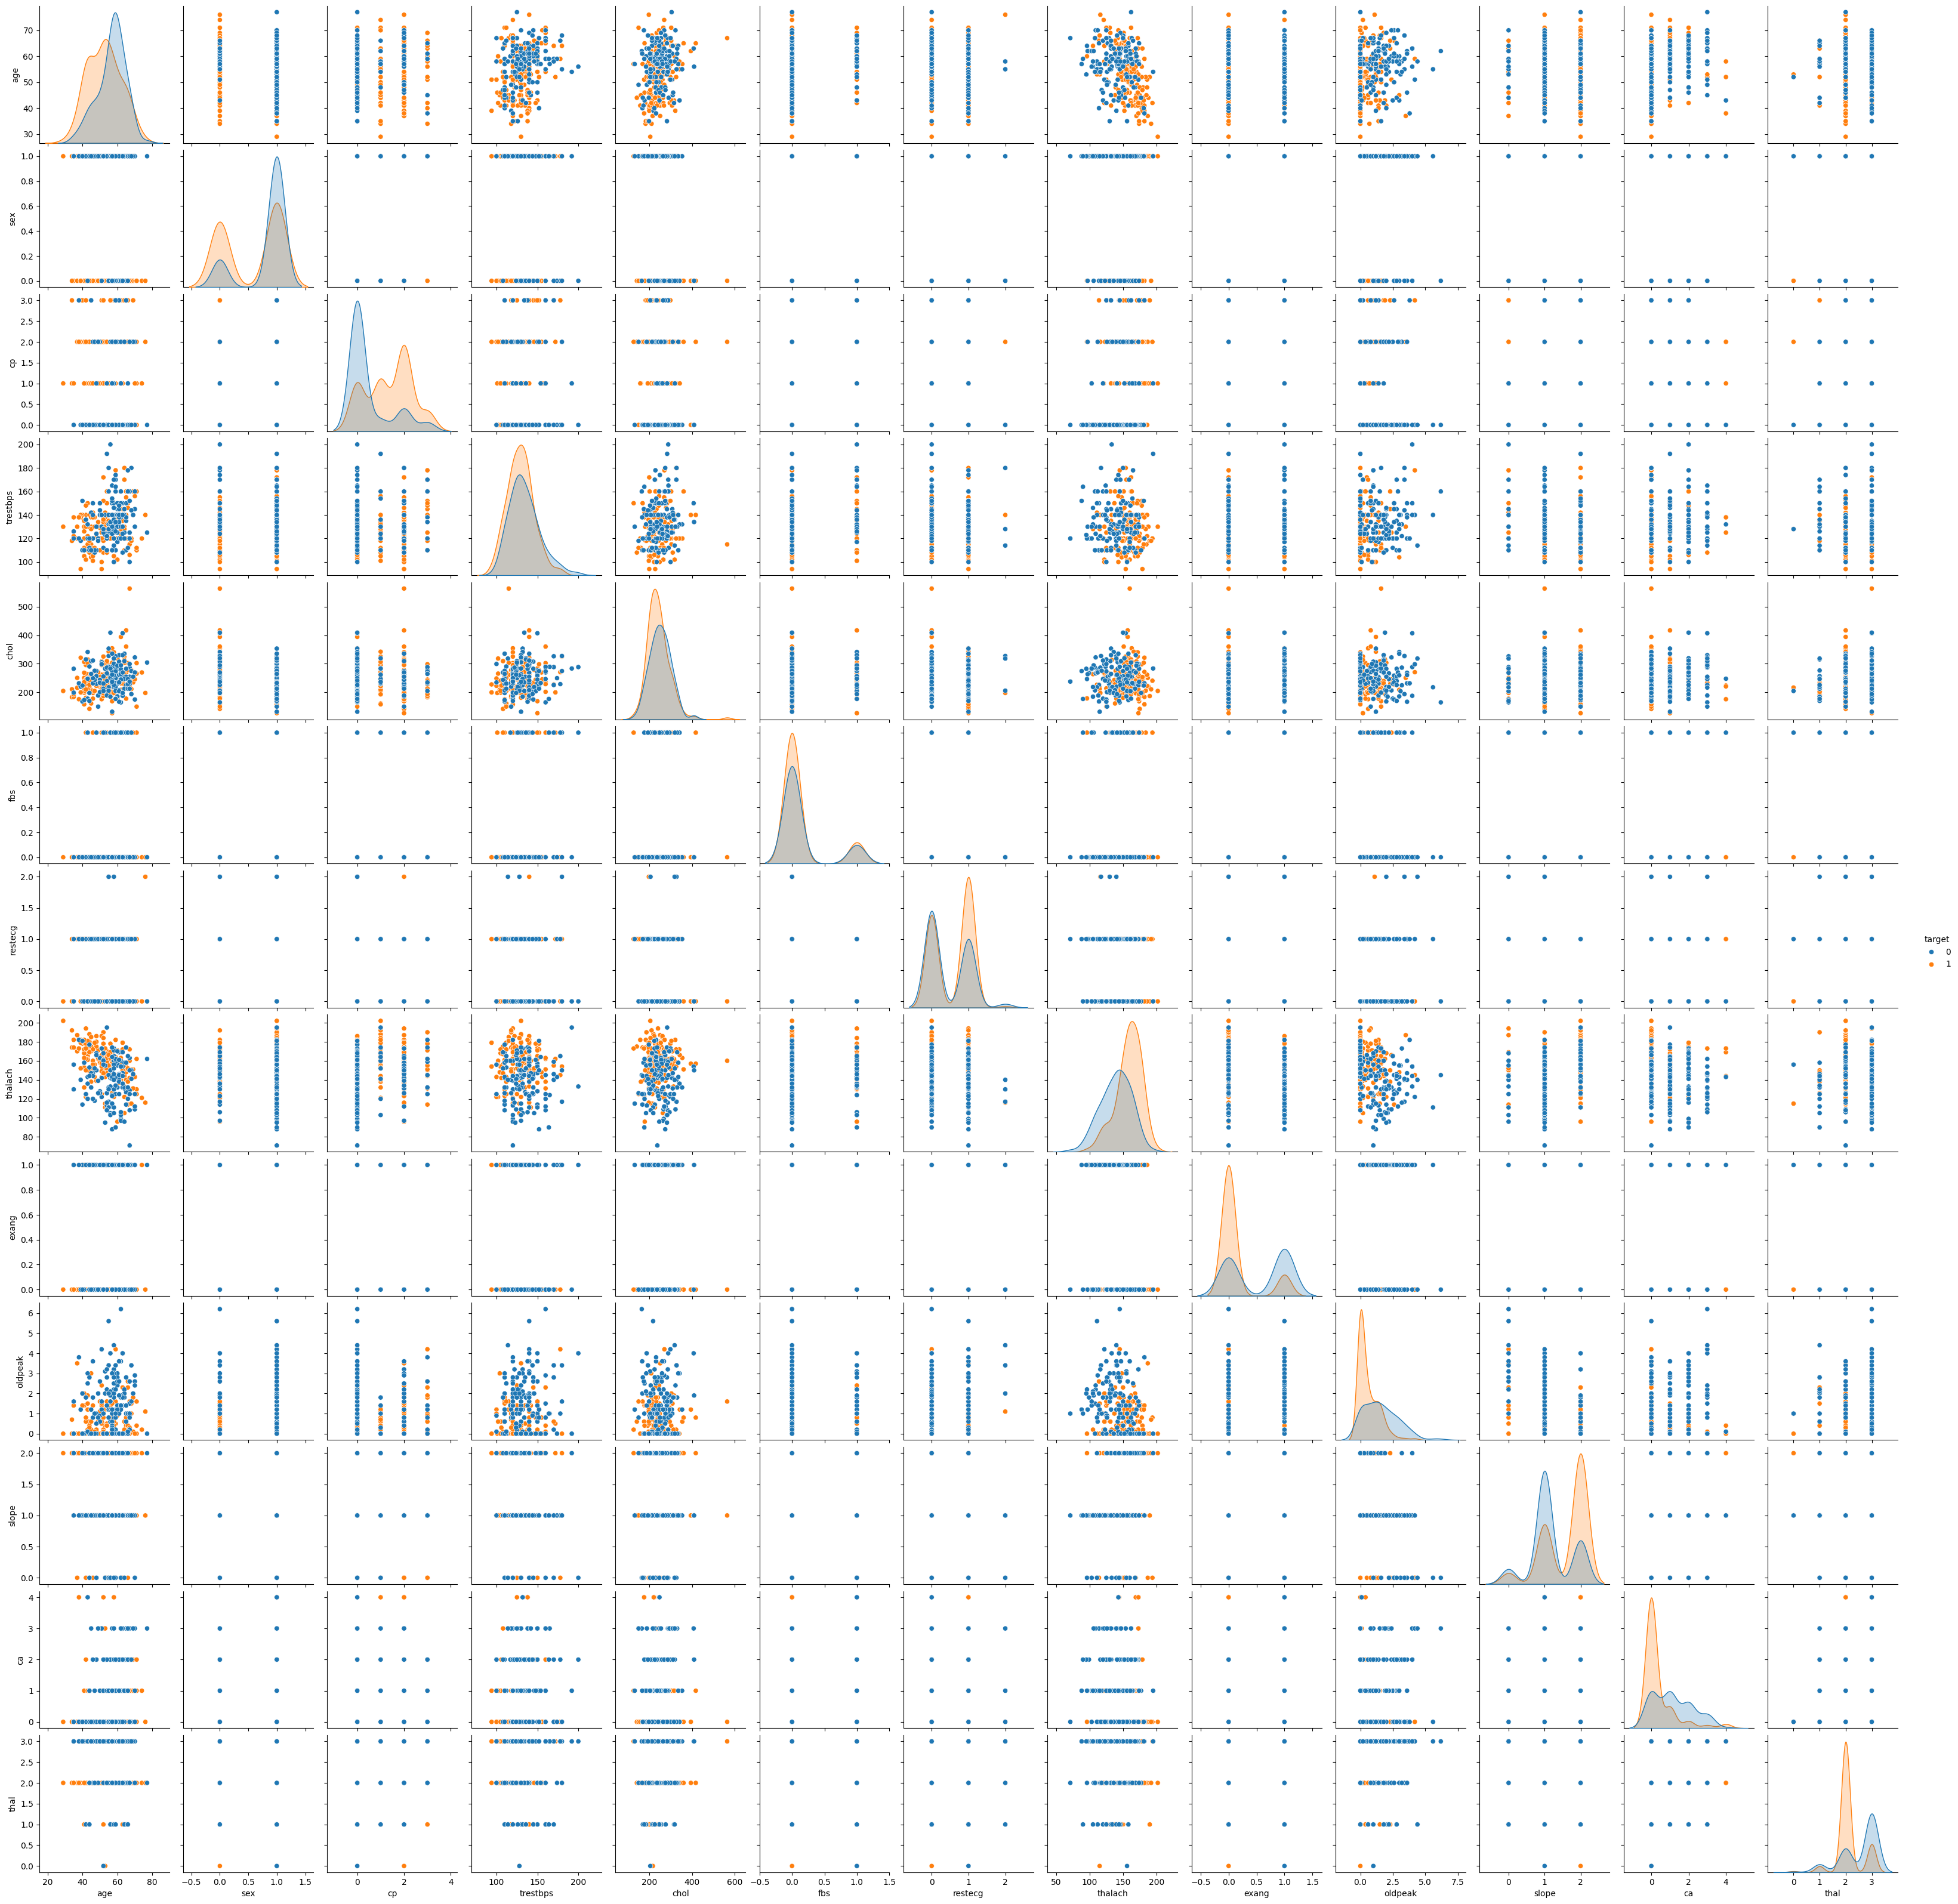

In [439]:
#multivariate analysis
sns.pairplot(df,hue='target')
plt.show()

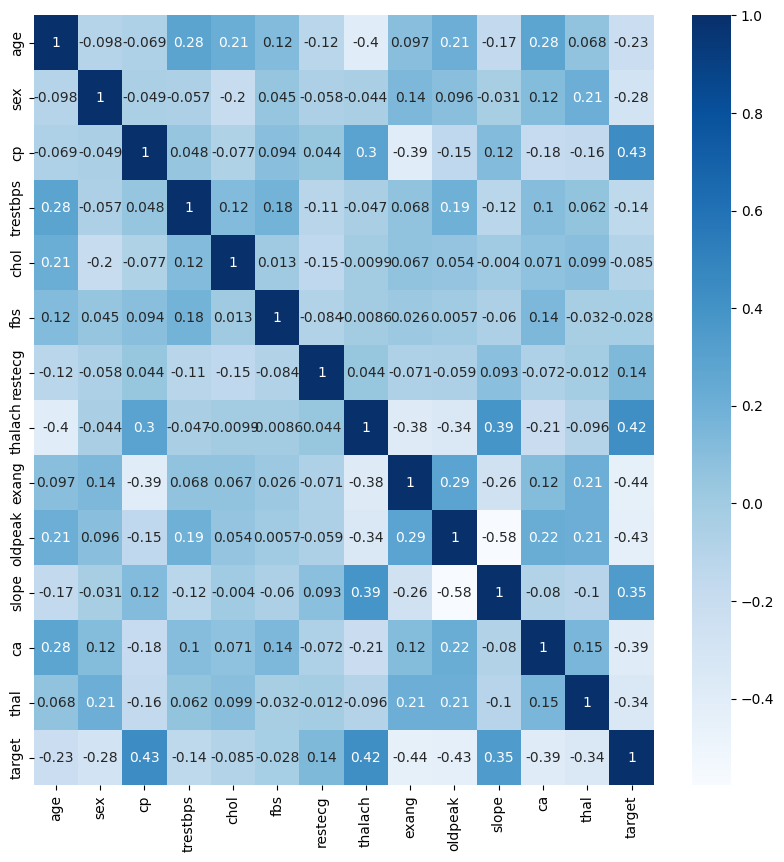

In [440]:
#corelation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

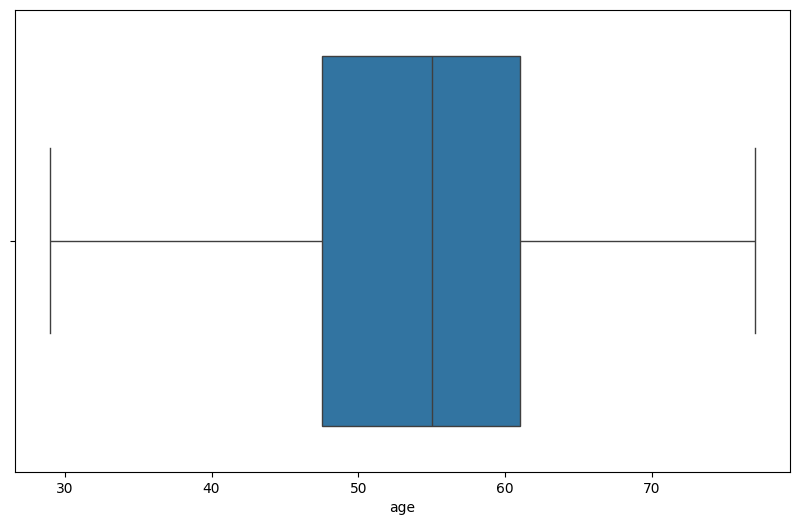

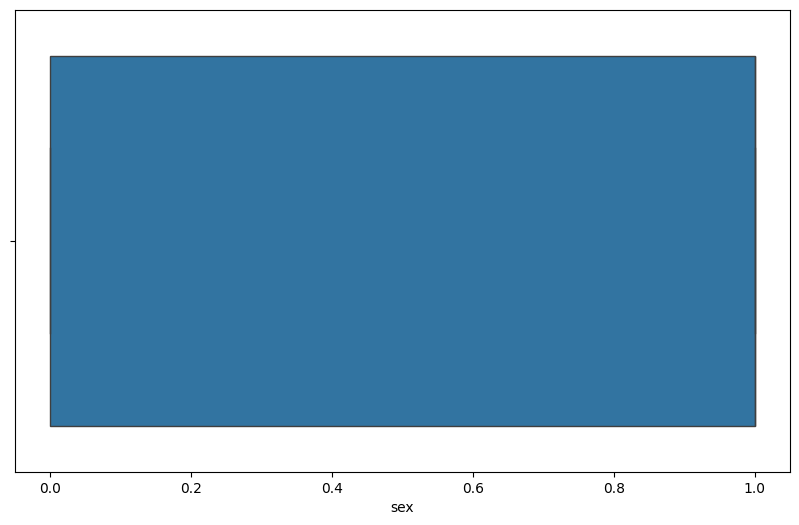

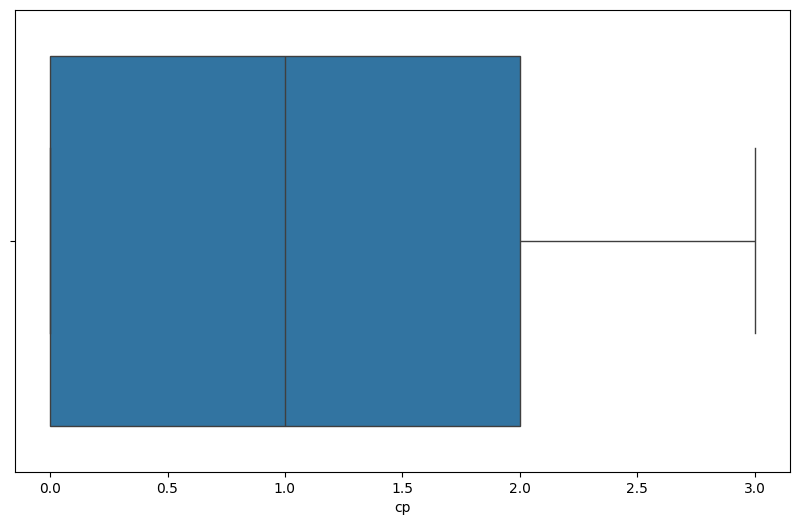

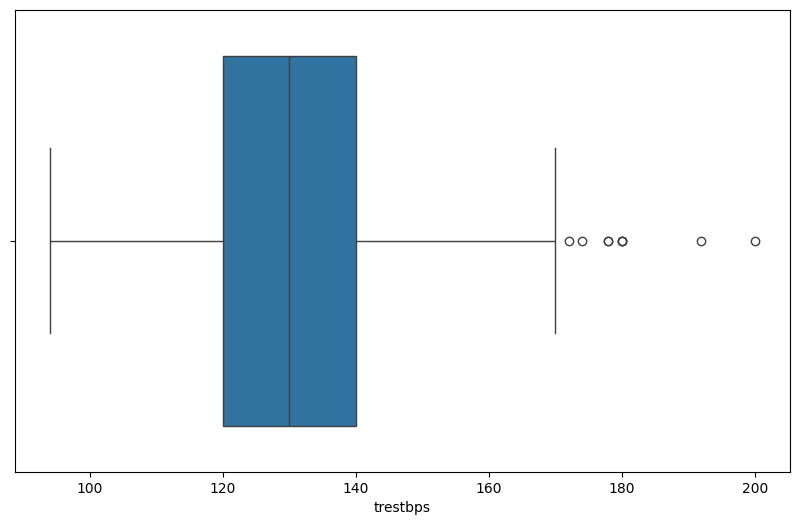

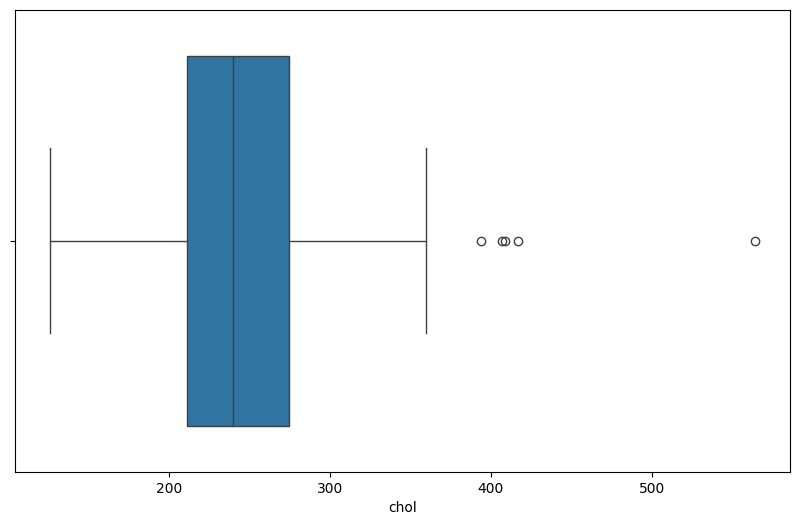

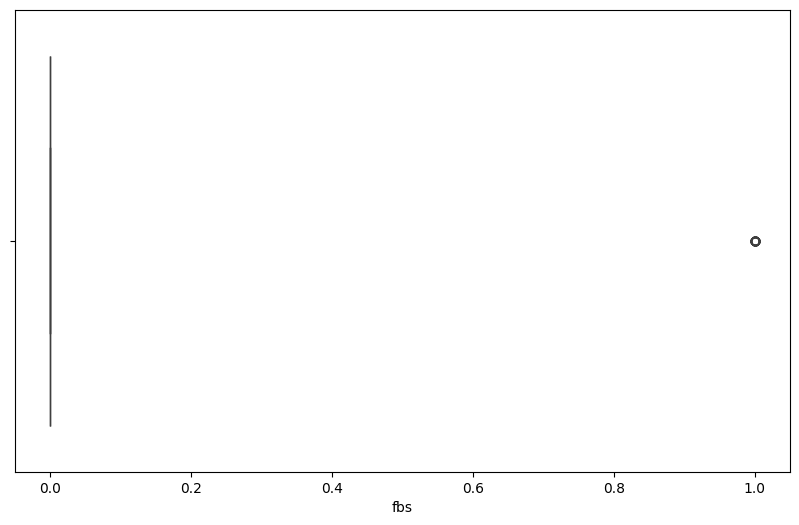

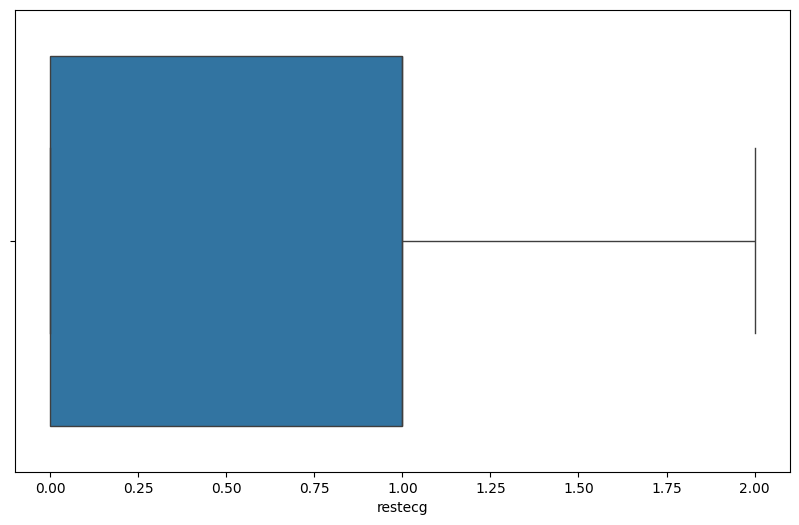

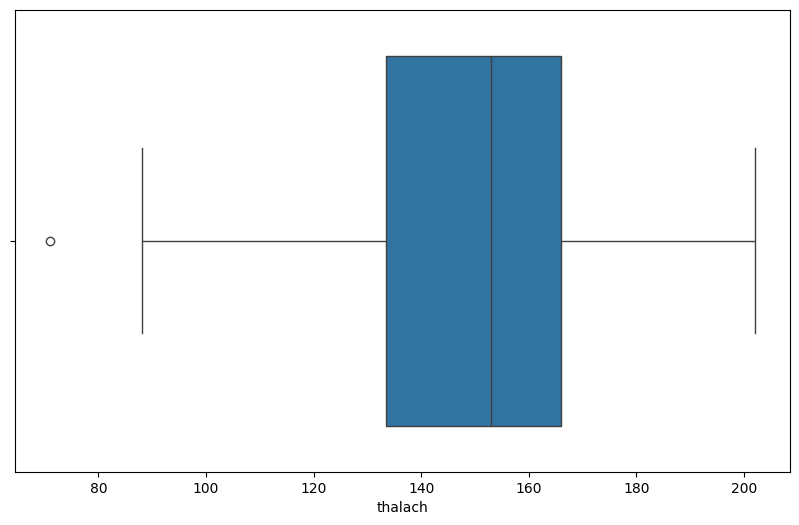

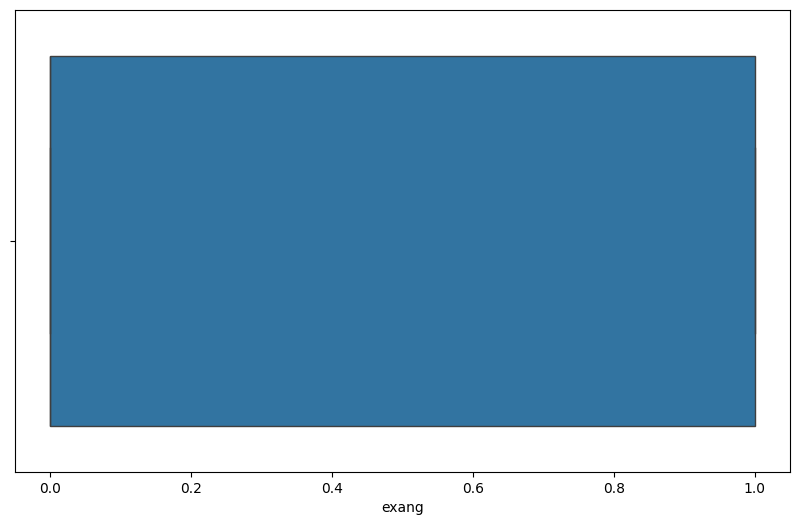

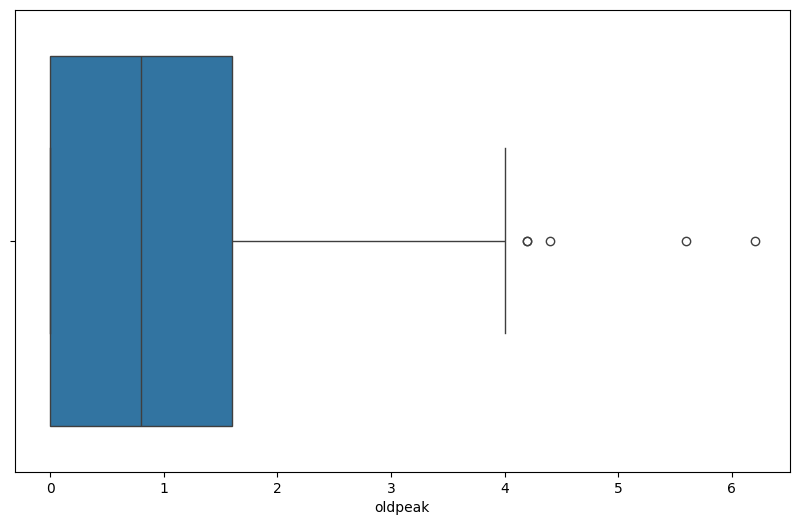

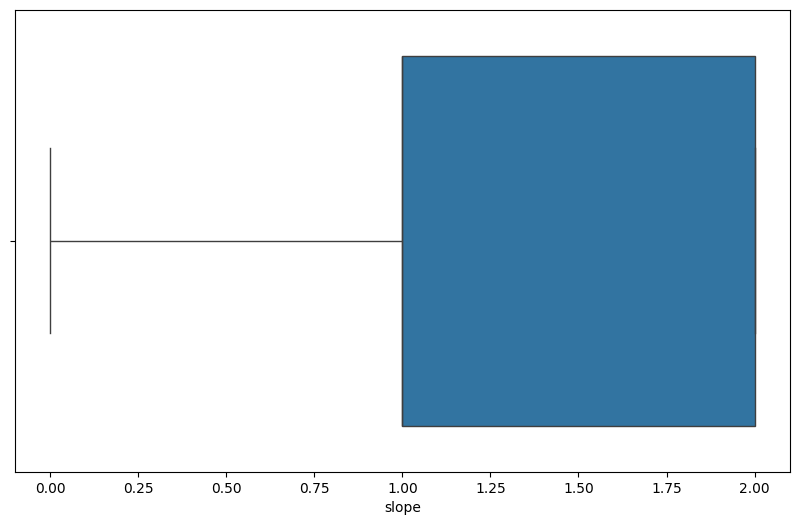

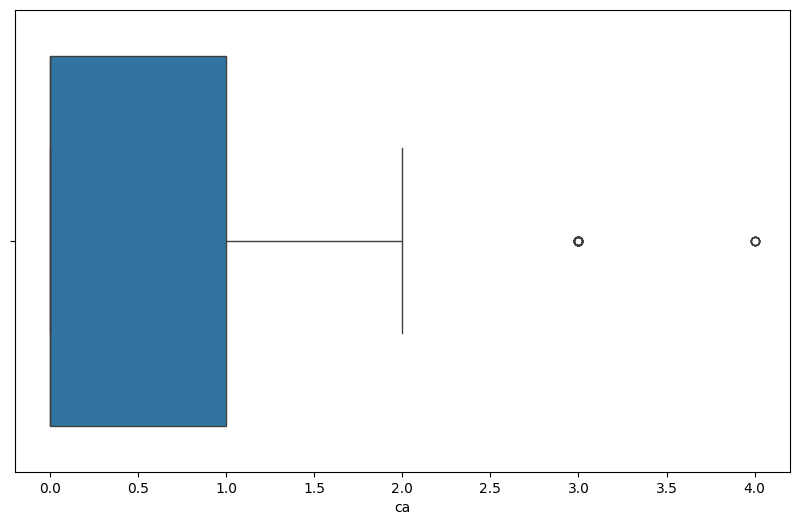

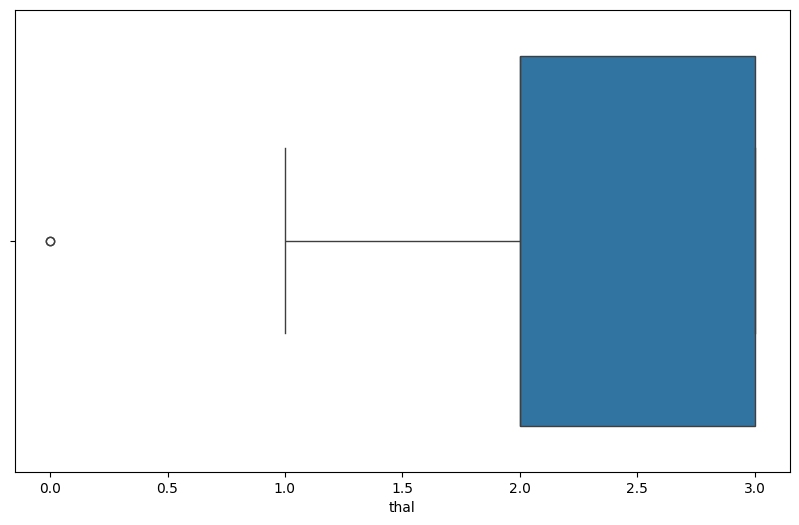

In [441]:
#outlier plotting
for col in df.drop(columns='target').columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(data=df,x=col)
  plt.show()

In [442]:
#finding the outlier values
for col in df.drop(columns='target').columns:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outliers=df[(df[col]<lower_bound) | (df[col]>upper_bound)]
  print(f"Outliers in {col}:")
  print(outliers)
  print("\n")

Outliers in age:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


Outliers in sex:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


Outliers in cp:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


Outliers in trestbps:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
8     52    1   2       172   199    1        1      162      0      0.5   
101   59    1   3       178   270    0        0      145      0      4.2   
110   64    0   0       180   325    0        1      154      1      0.0   
203   68    1   2       180   274    1        0      150      1      1.6   
223   56    0   0       200   288    1        0      133      1      4.0   
241   59    0   0       174   249    0        1      143      1      0.0   


In [443]:
#function for replacing outliers with median
def replace_outliers(df,col):
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df[col]=np.where(df[col]<lower_bound,df[col].median(),df[col])
  df[col]=np.where(df[col]>upper_bound,df[col].median(),df[col])
  return df


In [444]:
replace_outliers(df,"trestbps")
replace_outliers(df,"chol")
replace_outliers(df,"fbs")
replace_outliers(df,"thalach")
replace_outliers(df,"oldpeak")
replace_outliers(df,"ca")
replace_outliers(df,"thal")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0,0
299,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0,0
300,68,1,0,144.0,193.0,0.0,1,141.0,0,3.4,1,2.0,3.0,0
301,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0,3.0,0


In [445]:
#separating features and labels
X=df.drop(columns='target',axis=1)
y=df['target']

In [446]:
#train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [447]:
#data standardization
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [448]:
#Removing const features
constant_filter=VarianceThreshold(threshold=0)
X_train_scaled=constant_filter.fit_transform(X_train_scaled)
X_test_scaled=constant_filter.transform(X_test_scaled)

In [449]:
#feature selection
selector=SelectKBest(f_classif,k=8)
X_train_pd=selector.fit_transform(X_train_scaled,y_train)
X_test_pd=selector.transform(X_test_scaled)

#Model Training

In [450]:
#logistic regression
lr_model=LogisticRegression(max_iter=1000,random_state=42)
lr_model.fit(X_train_pd,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [451]:
explainer=shap.Explainer(lr_model,X_train_pd)
shap_values=explainer(X_test_pd)

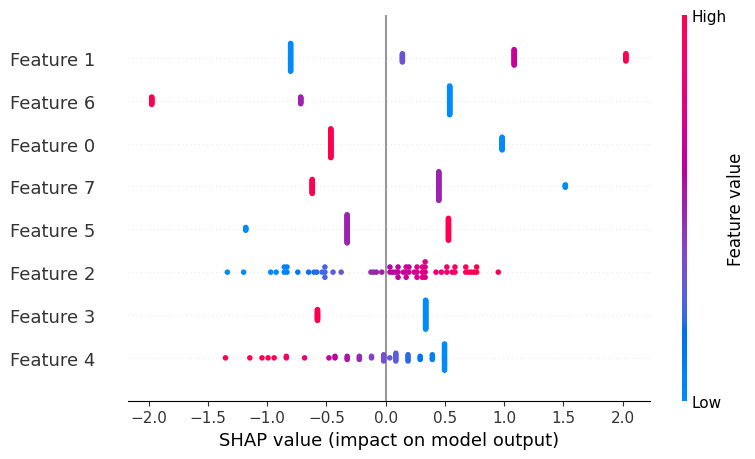

In [452]:
shap_class_1=shap_values.values

shap.summary_plot(shap_class_1,X_test_pd,max_display=X_test_pd.shape[1])

In [453]:
#training accuracy
y_pred_train=lr_model.predict(X_train_pd)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
#testing accuracy
y_pred_test=lr_model.predict(X_test_pd)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.8512396694214877
Testing Accuracy: 0.8688524590163934


In [454]:
#precision,recall and f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.8378378378378378
Recall: 0.9393939393939394
F1 Score: 0.8857142857142857


In [455]:
#random forest
rf_model=RandomForestClassifier(random_state=42,n_estimators=150,max_depth=10,min_samples_split=12,min_samples_leaf=12,max_features="log2")
rf_model.fit(X_train_pd,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=12,
                       min_samples_split=12, n_estimators=150, random_state=42)

In [456]:
explainer=shap.Explainer(rf_model,X_train_pd)
shap_values=explainer(X_test_pd)

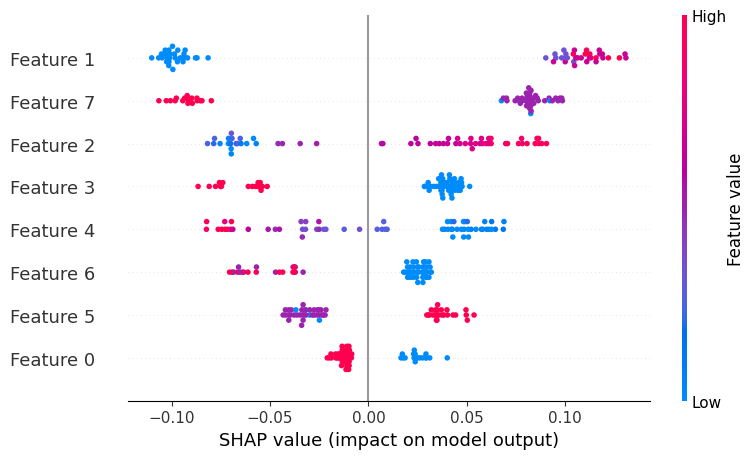

In [457]:
shap_class_1=shap_values[:,:,1]

shap.summary_plot(shap_class_1,X_test_pd,max_display=X_test_pd.shape[1])

In [458]:
#training accuracy
y_pred_train=rf_model.predict(X_train_pd)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
#testing accuracy
y_pred_test=rf_model.predict(X_test_pd)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.8636363636363636
Testing Accuracy: 0.7868852459016393


In [459]:
#precision,recall and f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.75
Recall: 0.9090909090909091
F1 Score: 0.821917808219178


In [460]:
#svm
svm_classifier=SVC(kernel="linear",C=5,random_state=42)
svm_classifier.fit(X_train_pd,y_train)

SVC(C=5, kernel='linear', random_state=42)

In [461]:
explainer=shap.Explainer(svm_classifier,X_train_pd)
shap_values=explainer(X_test_pd)

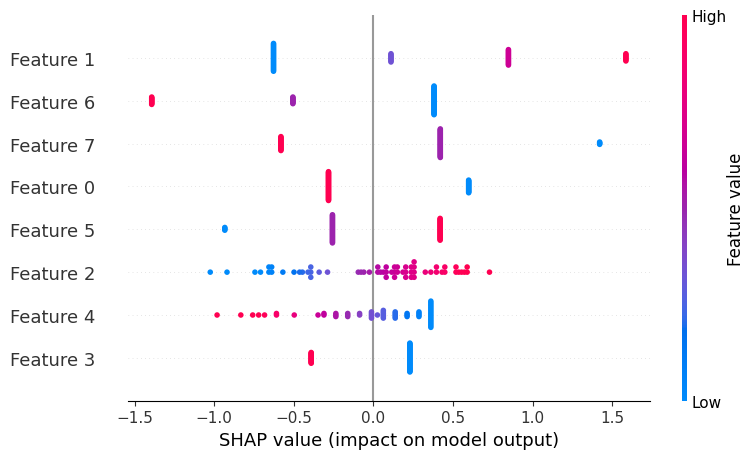

In [462]:
shap_class_1=shap_values.values
shap.summary_plot(shap_class_1,X_test_pd,max_display=X_test_pd.shape[1])

In [463]:
#training accuracy
y_pred_train=svm_classifier.predict(X_train_pd)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
#testing accuracy
y_pred_test=svm_classifier.predict(X_test_pd)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.8471074380165289
Testing Accuracy: 0.8688524590163934


In [464]:
#precision,recall and f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.8205128205128205
Recall: 0.9696969696969697
F1 Score: 0.8888888888888888


In [465]:
#xgboost
xgb_model = XGBClassifier(
    n_estimators=50,
    learning_rate=0.04,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.4,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_pd, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:37:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [466]:
explainer=shap.Explainer(xgb_model,X_train_pd)
shap_values=explainer(X_test_pd)

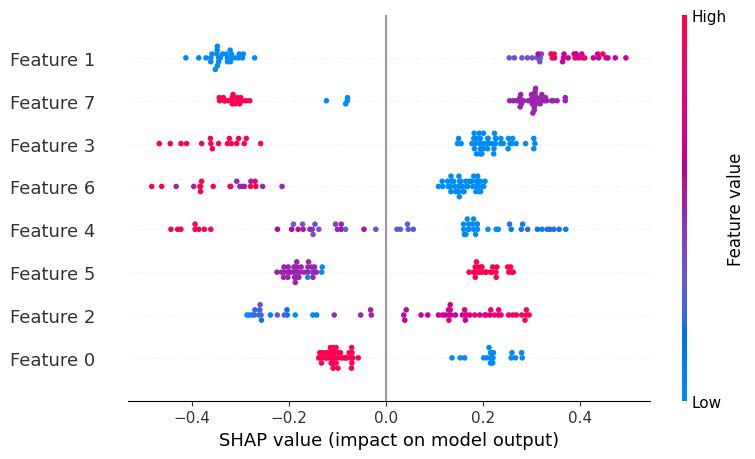

In [467]:
shap_class_1=shap_values.values
shap.summary_plot(shap_class_1,X_test_pd,max_display=X_test_pd.shape[1])

In [468]:
#training accuracy
y_pred_train=xgb_model.predict(X_train_pd)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
#testing accuracy
y_pred_test=xgb_model.predict(X_test_pd)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.8925619834710744
Testing Accuracy: 0.819672131147541


In [469]:
#decision tree
dt_model=DecisionTreeClassifier( criterion='gini',      # or 'entropy'
    max_depth=15,           # controls overfitting
    min_samples_split=12,  # minimum samples to split a node
    min_samples_leaf=12,    # minimum samples in each leaf
    random_state=42)
dt_model.fit(X_train_pd,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=12, min_samples_split=12,
                       random_state=42)

In [470]:
explainer=shap.Explainer(dt_model,X_train_pd)
shap_values=explainer(X_test_pd)

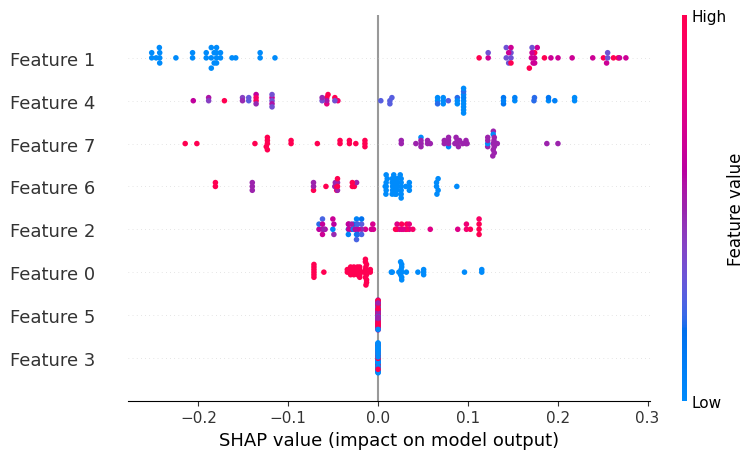

In [471]:
shap_class_1=shap_values[:,:,1]
shap.summary_plot(shap_class_1,X_test_pd,max_display=X_test_pd.shape[1])

In [472]:
#training accuracy
y_pred_train=dt_model.predict(X_train_pd)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
#testing accuracy
y_pred_test=dt_model.predict(X_test_pd)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.8388429752066116
Testing Accuracy: 0.7540983606557377


In [473]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=X_train_pd.shape[1],kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16,activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(8,activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [474]:
model.compile(optimizer=Adam(learning_rate=0.0005),loss="binary_crossentropy",metrics=['accuracy'])

In [475]:
early_stop=EarlyStopping(monitor='val_loss',patience=12,restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=5,min_lr=1e-6)

In [476]:
ann=model.fit(X_train_pd,y_train,epochs=100,batch_size=32,validation_data=(X_test_pd,y_test),callbacks=[early_stop,reduce_lr],verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 621ms/step - accuracy: 0.5219 - loss: 0.9280 - val_accuracy: 0.4754 - val_loss: 0.7752 - learning_rate: 5.0000e-04
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4279 - loss: 1.0804 - val_accuracy: 0.4754 - val_loss: 0.7650 - learning_rate: 5.0000e-04
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5508 - loss: 0.8752 - val_accuracy: 0.5082 - val_loss: 0.7565 - learning_rate: 5.0000e-04
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5478 - loss: 0.9319 - val_accuracy: 0.5082 - val_loss: 0.7490 - learning_rate: 5.0000e-04
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5081 - loss: 0.8569 - val_accuracy: 0.5082 - val_loss: 0.7405 - learning_rate: 5.0000e-04
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5542 - loss: 0.9625 - val_accuracy: 0.5246 - val_loss: 0.7334 - learning_rate: 5.0000e-04
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6040 - loss

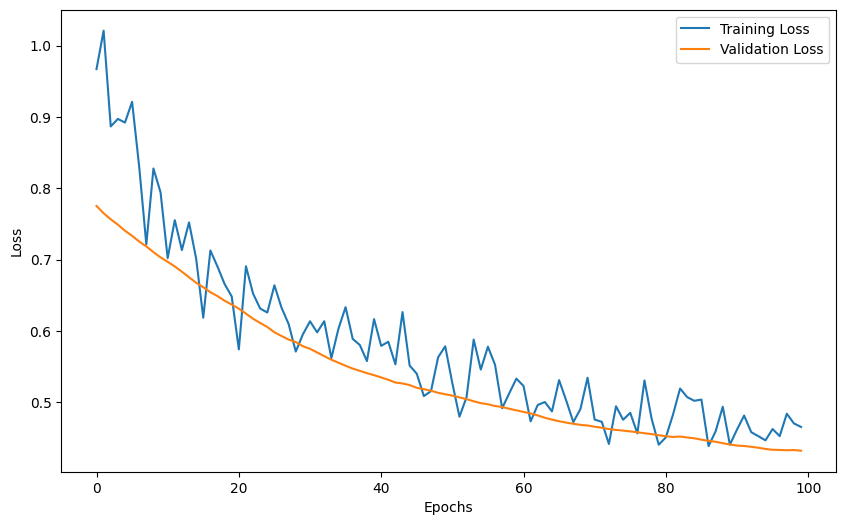

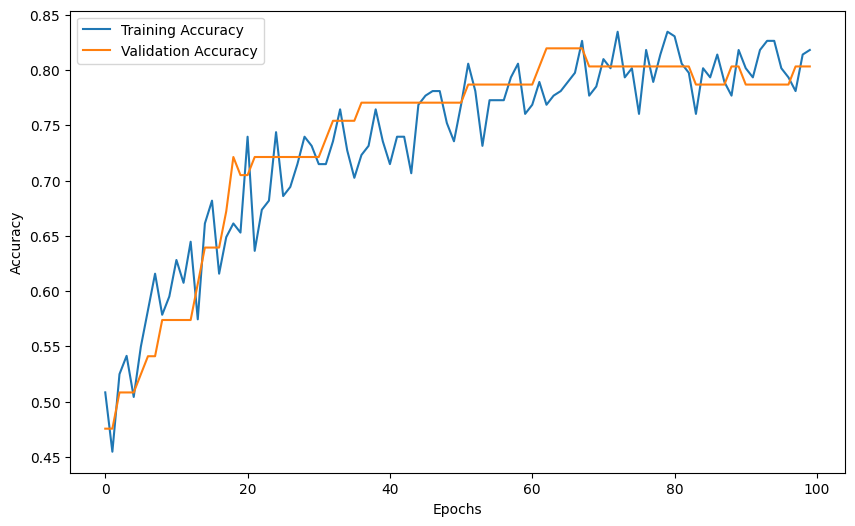

In [477]:
#Loss plot
plt.figure(figsize=(10,6))
plt.plot(ann.history['loss'],label='Training Loss')
plt.plot(ann.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Accuracy plot
plt.figure(figsize=(10,6))
plt.plot(ann.history['accuracy'],label='Training Accuracy')
plt.plot(ann.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Ablation Study

In [478]:
#Ablation study 1 without removing outliers
df_original=pd.read_csv("/content/heart_disease_data.csv")
df=df_original.copy()

In [479]:
#separate labels
X=df.drop(columns='target',axis=1)
y=df['target']

In [480]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [481]:
#data standaardization
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [482]:
#Removing const features
constant_filter=VarianceThreshold(threshold=0)
X_train_scaled=constant_filter.fit_transform(X_train_scaled)
X_test_scaled=constant_filter.transform(X_test_scaled)

In [483]:
#feature selection
selector=SelectKBest(f_classif,k=8)
X_train_pd=selector.fit_transform(X_train_scaled,y_train)
X_test_pd=selector.transform(X_test_scaled)

In [484]:
#Model training
#logistic regression
lr=LogisticRegression(max_iter=1000,random_state=42)
lr.fit(X_train_pd,y_train)
#random forest
rf_model=RandomForestClassifier(random_state=42,n_estimators=150,max_depth=10,min_samples_split=12,min_samples_leaf=12,max_features="log2")
rf_model.fit(X_train_pd,y_train)
#svm
svm_classifier=SVC(kernel="linear",C=5,random_state=42)
svm_classifier.fit(X_train_pd,y_train)
#xgboost
xgb_model = XGBClassifier(
    n_estimators=50,
    learning_rate=0.04,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.4,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_pd, y_train)
#decision tree
dt_model=DecisionTreeClassifier( criterion='gini',      # or 'entropy'
    max_depth=15,           # controls overfitting
    min_samples_split=12,  # minimum samples to split a node
    min_samples_leaf=12,    # minimum samples in each leaf
    random_state=42)
dt_model.fit(X_train_pd,y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:38:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


DecisionTreeClassifier(max_depth=15, min_samples_leaf=12, min_samples_split=12,
                       random_state=42)

In [485]:
#model evaluation
#lr
y_pred_train=lr.predict(X_train_pd)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
y_pred_test=lr.predict(X_test_pd)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.8553719008264463
Testing Accuracy: 0.819672131147541


In [486]:
#recall,precision and f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.7619047619047619
Recall: 0.9696969696969697
F1 Score: 0.8533333333333334


In [487]:
#random forest
y_pred_train=rf_model.predict(X_train_pd)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
y_pred_test=rf_model.predict(X_test_pd)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.8677685950413223
Testing Accuracy: 0.819672131147541


In [488]:
#precision,recall and f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.7619047619047619
Recall: 0.9696969696969697
F1 Score: 0.8533333333333334


In [489]:
#svm
y_pred_train=svm_classifier.predict(X_train_pd)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
y_pred_test=svm_classifier.predict(X_test_pd)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.859504132231405
Testing Accuracy: 0.8032786885245902


In [490]:
#precision,recall and f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.7560975609756098
Recall: 0.9393939393939394
F1 Score: 0.8378378378378378


In [491]:
#xgboost
y_pred_train=xgb_model.predict(X_train_pd)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
y_pred_test=xgb_model.predict(X_test_pd)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.8925619834710744
Testing Accuracy: 0.8524590163934426


In [492]:
#precision,recall aand f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.8
Recall: 0.9696969696969697
F1 Score: 0.8767123287671232


In [493]:
#decision tree
y_pred_train=dt_model.predict(X_train_pd)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
y_pred_test=dt_model.predict(X_test_pd)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.8429752066115702
Testing Accuracy: 0.7540983606557377


In [494]:
#precision,recall and f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.75
Recall: 0.8181818181818182
F1 Score: 0.782608695652174


In [495]:
#ann model training
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=X_train_pd.shape[1],kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16,activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(8,activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [496]:
model.compile(optimizer=Adam(learning_rate=0.0005),loss="binary_crossentropy",metrics=['accuracy'])

In [497]:
early_stop=EarlyStopping(monitor='val_loss',patience=12,restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=5,min_lr=1e-6)

In [498]:
ann=model.fit(X_train_pd,y_train,epochs=100,batch_size=32,validation_data=(X_test_pd,y_test),callbacks=[early_stop,reduce_lr],verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 567ms/step - accuracy: 0.4006 - loss: 1.3746 - val_accuracy: 0.3934 - val_loss: 0.7861 - learning_rate: 5.0000e-04
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4057 - loss: 1.2079 - val_accuracy: 0.4262 - val_loss: 0.7745 - learning_rate: 5.0000e-04
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4702 - loss: 1.0413 - val_accuracy: 0.4262 - val_loss: 0.7630 - learning_rate: 5.0000e-04
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5076 - loss: 1.0796 - val_accuracy: 0.5246 - val_loss: 0.7532 - learning_rate: 5.0000e-04
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4909 - loss: 1.0073 - val_accuracy: 0.5410 - val_loss: 0.7449 - learning_rate: 5.0000e-04
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4991 - loss: 1.0865 - val_accuracy: 0.5574 - val_loss: 0.7348 - learning_rate: 5.0000e-04
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5711 - loss

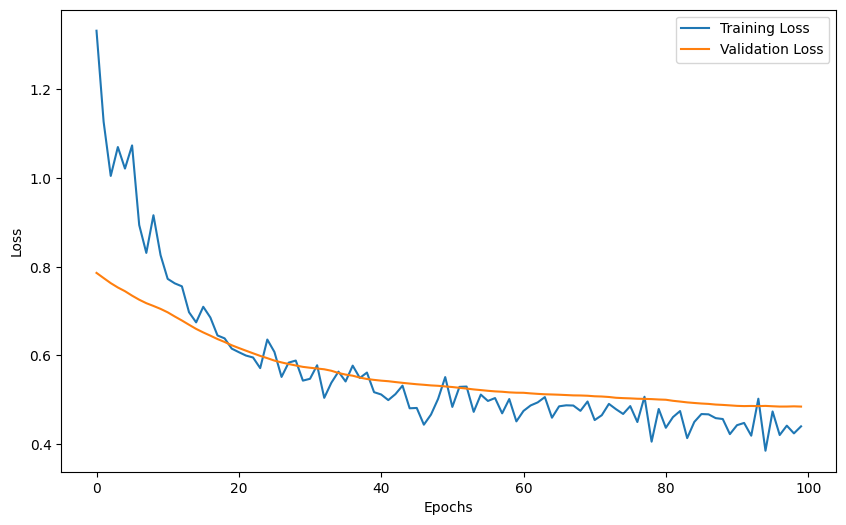

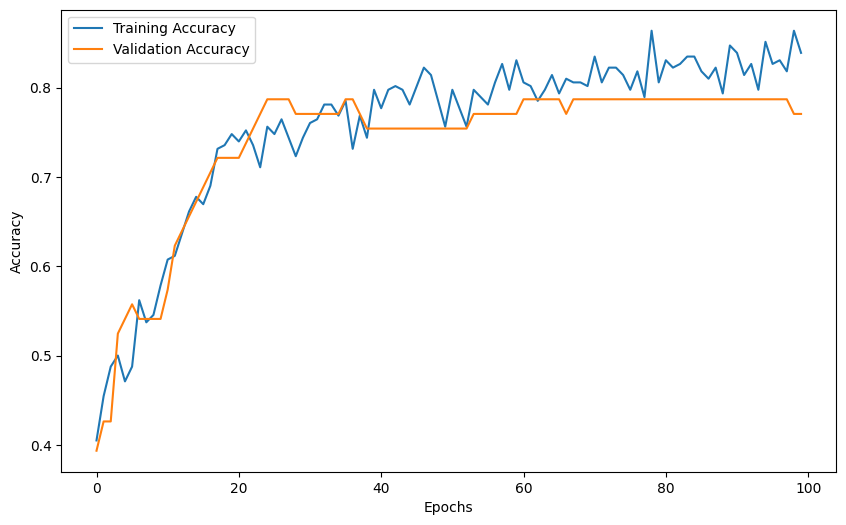

In [499]:
#loss plot
plt.figure(figsize=(10,6))
plt.plot(ann.history['loss'],label='Training Loss')
plt.plot(ann.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#accuracy plot
plt.figure(figsize=(10,6))
plt.plot(ann.history['accuracy'],label='Training Accuracy')
plt.plot(ann.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [500]:
#Ablation study 2 with 75:25 train test split
df_original=pd.read_csv("/content/heart_disease_data.csv")
df=df_original.copy()


In [501]:
#replacing outliers with median
replace_outliers(df,"trestbps")
replace_outliers(df,"chol")
replace_outliers(df,"fbs")
replace_outliers(df,"thalach")
replace_outliers(df,"oldpeak")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144.0,193.0,0.0,1,141.0,0,3.4,1,2,3,0
301,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1,3,0


In [502]:
#separating labels
X=df.drop(columns='target',axis=1)
y=df['target']

In [503]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)

In [504]:
#data stancdardization
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [505]:
#Removing const features
constant_filter=VarianceThreshold(threshold=0)
X_train_scaled=constant_filter.fit_transform(X_train_scaled)
X_test_scaled=constant_filter.transform(X_test_scaled)

In [506]:
#feature selection
selector=SelectKBest(f_classif,k=8)
X_train_pd=selector.fit_transform(X_train_scaled,y_train)
X_test_pd=selector.transform(X_test_scaled)

In [513]:
#Model  training
lr=LogisticRegression(max_iter=1000,random_state=42)
lr.fit(X_train_pd,y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [514]:
#training and test accuracy of lr
y_pred_train=lr.predict(X_train_pd)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
y_pred_test=lr.predict(X_test_pd)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.8810572687224669
Testing Accuracy: 0.7763157894736842


In [515]:
#precision,recall and f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.74
Recall: 0.9024390243902439
F1 Score: 0.8131868131868132


In [520]:
svm=SVC(kernel="linear",C=5,random_state=42)
svm.fit(X_train_pd,y_train)

SVC(C=5, kernel='linear', random_state=42)

In [521]:
#training and testing accuracy
y_pred_train=svm.predict(X_train_pd)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
y_pred_test=svm.predict(X_test_pd)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))


Training Accuracy: 0.8898678414096917
Testing Accuracy: 0.7763157894736842


In [524]:
#precision,recall and f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.74
Recall: 0.9024390243902439
F1 Score: 0.8131868131868132


In [522]:
rf=RandomForestClassifier(random_state=42,n_estimators=150,max_depth=10,min_samples_split=12,min_samples_leaf=12,max_features="log2")
rf.fit(X_train_pd,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=12,
                       min_samples_split=12, n_estimators=150, random_state=42)

In [523]:
#training and testing accuracy
y_pred_train=rf.predict(X_train_pd)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
y_pred_test=rf.predict(X_test_pd)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.8810572687224669
Testing Accuracy: 0.7763157894736842


In [525]:
#precision,recall and f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.74
Recall: 0.9024390243902439
F1 Score: 0.8131868131868132


In [526]:
xgb_model= XGBClassifier(
    n_estimators=50,
    learning_rate=0.04,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.4,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_pd, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:51:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [527]:
#training and testing accuracy
y_pred_train=xgb_model.predict(X_train_pd)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
y_pred_test=xgb_model.predict(X_test_pd)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.9074889867841409
Testing Accuracy: 0.7894736842105263


In [528]:
#precision,recall and f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.7450980392156863
Recall: 0.926829268292683
F1 Score: 0.8260869565217391


In [529]:
dt_model=DecisionTreeClassifier( criterion='gini',      # or 'entropy'
    max_depth=15,           # controls overfitting
    min_samples_split=12,  # minimum samples to split a node
    min_samples_leaf=12,    # minimum samples in each leaf
    random_state=42)
dt_model.fit(X_train_pd,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=12, min_samples_split=12,
                       random_state=42)

In [530]:
#training and testing accuracy
y_pred_train=dt_model.predict(X_train_pd)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
y_pred_test=dt_model.predict(X_test_pd)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.8590308370044053
Testing Accuracy: 0.7368421052631579


In [531]:
#precision,recall and f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.7333333333333333
Recall: 0.8048780487804879
F1 Score: 0.7674418604651163


In [532]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=X_train_pd.shape[1],kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16,activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(8,activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [533]:
model.compile(optimizer=Adam(learning_rate=0.0005),loss="binary_crossentropy",metrics=['accuracy'])

In [534]:
early_stop=EarlyStopping(monitor='val_loss',patience=12,restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=5,min_lr=1e-6)

In [535]:
ann=model.fit(X_train_pd,y_train,epochs=100,batch_size=32,validation_data=(X_test_pd,y_test),callbacks=[early_stop,reduce_lr],verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 506ms/step - accuracy: 0.5928 - loss: 0.8365 - val_accuracy: 0.5263 - val_loss: 0.7329 - learning_rate: 5.0000e-04
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5647 - loss: 0.8153 - val_accuracy: 0.5658 - val_loss: 0.7215 - learning_rate: 5.0000e-04
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6366 - loss: 0.7697 - val_accuracy: 0.5921 - val_loss: 0.7119 - learning_rate: 5.0000e-04
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6554 - loss: 0.7078 - val_accuracy: 0.6579 - val_loss: 0.7000 - learning_rate: 5.0000e-04
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6195 - loss: 0.7301 - val_accuracy: 0.6316 - val_loss: 0.6864 - learning_rate: 5.0000e-04
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6151 - loss: 0.6973 - val_accuracy: 0.6842 - val_loss: 0.6742 - learning_rate: 5.0000e-04
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6198 - loss

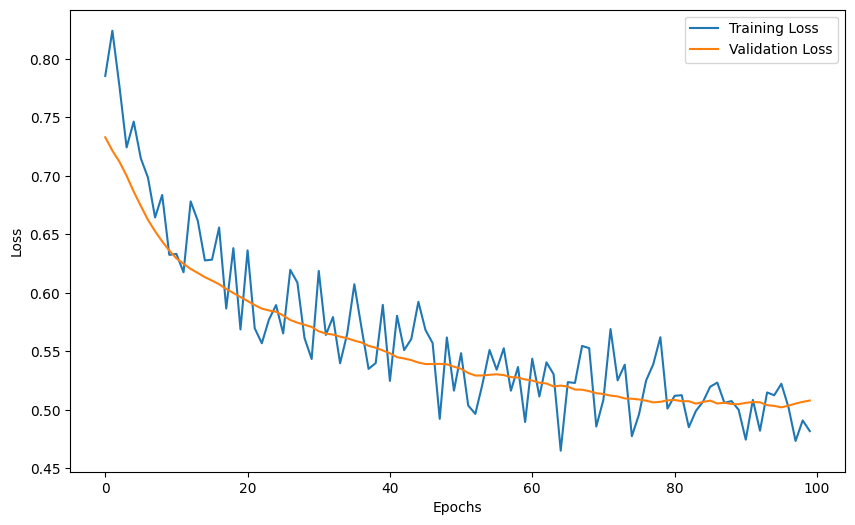

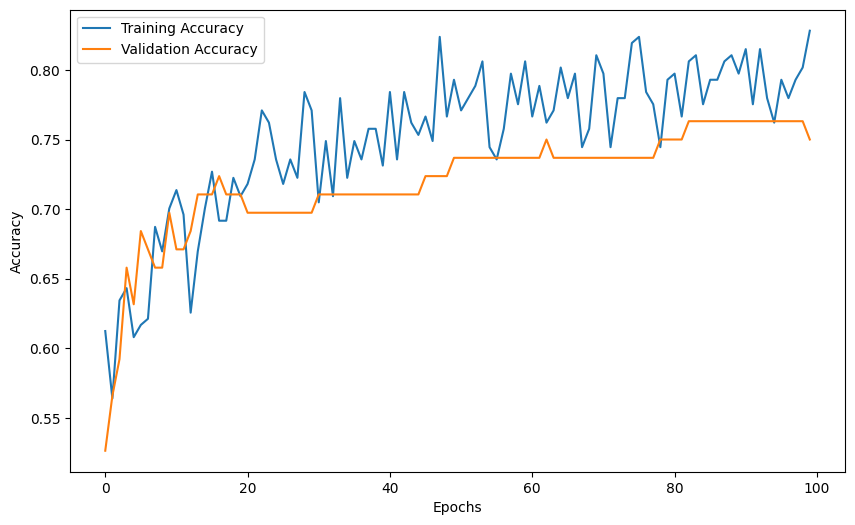

In [536]:
#loss plot
plt.figure(figsize=(10,6))
plt.plot(ann.history['loss'],label='Training Loss')
plt.plot(ann.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#Accuracy plot
plt.figure(figsize=(10,6))
plt.plot(ann.history['accuracy'],label='Training Accuracy')
plt.plot(ann.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [537]:
#Ablation sytudy 3 without feature selection
df_original=pd.read_csv("/content/heart_disease_data.csv")
df=df_original.copy()

In [538]:
#replacing outliers
replace_outliers(df,"trestbps")
replace_outliers(df,"chol")
replace_outliers(df,"fbs")
replace_outliers(df,"thalach")
replace_outliers(df,"oldpeak")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144.0,193.0,0.0,1,141.0,0,3.4,1,2,3,0
301,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1,3,0


In [539]:
#separate labels
X=df.drop(columns='target',axis=1)
y=df['target']

In [540]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [541]:
#data standardization
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [542]:
#model training
lr=LogisticRegression(max_iter=1000,random_state=42)
lr.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [543]:
#training and testing accuracy
y_pred_train=lr.predict(X_train_scaled)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
y_pred_test=lr.predict(X_test_scaled)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.859504132231405
Testing Accuracy: 0.7868852459016393


In [544]:
#precision,recall and f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.75
Recall: 0.9090909090909091
F1 Score: 0.821917808219178


In [545]:
svm=SVC(kernel="linear",C=5,random_state=42)
svm.fit(X_train_scaled,y_train)

SVC(C=5, kernel='linear', random_state=42)

In [546]:
#training and testing accuracy
y_pred_train=svm.predict(X_train_scaled)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
y_pred_test=svm.predict(X_test_scaled)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.871900826446281
Testing Accuracy: 0.7868852459016393


In [547]:
#precision,recall and f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.7380952380952381
Recall: 0.9393939393939394
F1 Score: 0.8266666666666667


In [548]:
rf=RandomForestClassifier(random_state=42,n_estimators=150,max_depth=10,min_samples_split=12,min_samples_leaf=12,max_features="log2")
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=12,
                       min_samples_split=12, n_estimators=150, random_state=42)

In [549]:
#training and testing accuracy
y_pred_train=rf.predict(X_train_scaled)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
y_pred_test=rf.predict(X_test_scaled)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.8842975206611571
Testing Accuracy: 0.8032786885245902


In [550]:
#precision,recall and f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.7441860465116279
Recall: 0.9696969696969697
F1 Score: 0.8421052631578947


In [551]:
xgb_model= XGBClassifier(
    n_estimators=50,
    learning_rate=0.04,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.4,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:11:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [552]:
#training and testing accuracy
y_pred_train=xgb_model.predict(X_train_scaled)
print("Training accuracy:",accuracy_score(y_train,y_pred_train))
y_pred_test=xgb_model.predict(X_test_scaled)
print("Testing accuracy:",accuracy_score(y_test,y_pred_test))

Training accuracy: 0.9049586776859504
Testing accuracy: 0.819672131147541


In [553]:
#precision,recall and f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.7619047619047619
Recall: 0.9696969696969697
F1 Score: 0.8533333333333334


In [554]:
dt_model=DecisionTreeClassifier( criterion='gini',      # or 'entropy'
    max_depth=15,           # controls overfitting
    min_samples_split=12,  # minimum samples to split a node
    min_samples_leaf=12,    # minimum samples in each leaf
    random_state=42)
dt_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=12, min_samples_split=12,
                       random_state=42)

In [555]:
#training accuracy and testing accuracy
y_pred_train=dt_model.predict(X_train_scaled)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
y_pred_test=dt_model.predict(X_test_scaled)
print("Testing Accuracy:",accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.8471074380165289
Testing Accuracy: 0.7540983606557377


In [556]:
#precision,recall and f1 score
print("Precision:",precision_score(y_test,y_pred_test))
print("Recall:",recall_score(y_test,y_pred_test))
print("F1 Score:",f1_score(y_test,y_pred_test))

Precision: 0.75
Recall: 0.8181818181818182
F1 Score: 0.782608695652174


In [557]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=X_train_scaled.shape[1],kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16,activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(8,activation='relu',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [558]:
model.compile(optimizer=Adam(learning_rate=0.0005),loss="binary_crossentropy",metrics=['accuracy'])

In [559]:
early_stop=EarlyStopping(monitor='val_loss',patience=12,restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=5,min_lr=1e-6)

In [560]:
ann=model.fit(X_train_scaled,y_train,epochs=100,batch_size=32,validation_data=(X_test_scaled,y_test),callbacks=[early_stop,reduce_lr],verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 525ms/step - accuracy: 0.5047 - loss: 0.9614 - val_accuracy: 0.3934 - val_loss: 0.7877 - learning_rate: 5.0000e-04
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4449 - loss: 1.0136 - val_accuracy: 0.4426 - val_loss: 0.7807 - learning_rate: 5.0000e-04
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5252 - loss: 0.9638 - val_accuracy: 0.4754 - val_loss: 0.7722 - learning_rate: 5.0000e-04
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5775 - loss: 0.8633 - val_accuracy: 0.4918 - val_loss: 0.7645 - learning_rate: 5.0000e-04
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5274 - loss: 0.8578 - val_accuracy: 0.4754 - val_loss: 0.7579 - learning_rate: 5.0000e-04
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5302 - loss: 0.8392 - val_accuracy: 0.5082 - val_loss: 0.7512 - learning_rate: 5.0000e-04
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5266 - loss

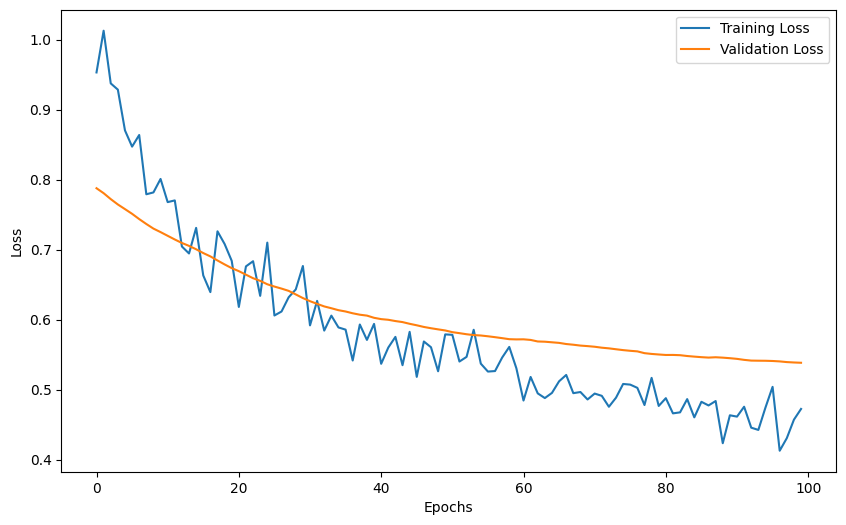

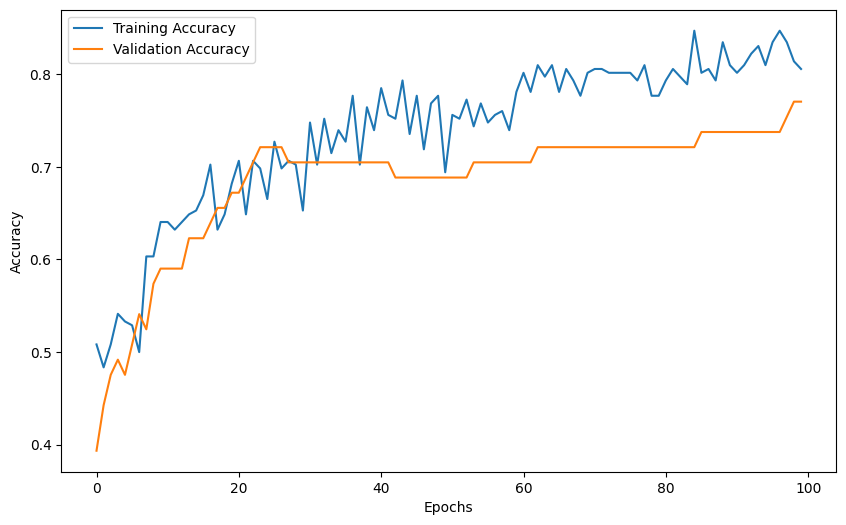

In [561]:
#loss plot
plt.figure(figsize=(10,6))
plt.plot(ann.history['loss'],label='Training Loss')
plt.plot(ann.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#accuracy plot
plt.figure(figsize=(10,6))
plt.plot(ann.history['accuracy'],label='Training Accuracy')
plt.plot(ann.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()